In [45]:
# Chargement des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des données

On importe les données de 2020 à 2022

In [47]:
# Année 2022
df_carac_2022 = pd.read_csv("../data/caracteristiques_2022.csv", sep=';', low_memory=False)
df_lieux_2022 = pd.read_csv("../data/lieux_2022.csv", sep=';', low_memory=False)
df_usagers_2022 = pd.read_csv("../data/usagers_2022.csv", sep=';', low_memory=False)
df_vehicules_2022 = pd.read_csv("../data/vehicules_2022.csv", sep=';', low_memory=False)

# Année 2021
df_carac_2021 = pd.read_csv("../data/caracteristiques_2021.csv", sep=';', low_memory=False)
df_lieux_2021 = pd.read_csv("../data/lieux_2021.csv", sep=';', low_memory=False)
df_usagers_2021 = pd.read_csv("../data/usagers_2021.csv", sep=';', low_memory=False)
df_vehicules_2021 = pd.read_csv("../data/vehicules_2021.csv", sep=';', low_memory=False)

# Année 2020
df_carac_2020 = pd.read_csv("../data/caracteristiques_2020.csv", sep=';', low_memory=False)
df_lieux_2020 = pd.read_csv("../data/lieux_2020.csv", sep=';', low_memory=False)
df_usagers_2020 = pd.read_csv("../data/usagers_2020.csv", sep=';', low_memory=False)
df_vehicules_2020 = pd.read_csv("../data/vehicules_2020.csv", sep=';', low_memory=False)


# Jointure

In [49]:
# On modifie le nom de la colonne de df_carac_2022

df_carac_2022.rename(columns={'Accident_Id': 'Num_Acc'}, inplace=True)

In [50]:
# On joint les df par années

df_merged_2022_1 = pd.merge(df_usagers_2022, df_vehicules_2022, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2022_2 = pd.merge(df_merged_2022_1, df_lieux_2022, on='Num_Acc')
df_merged_2022 = pd.merge(df_merged_2022_2, df_carac_2022, on='Num_Acc')

In [51]:
# On fait de même avec les autres années

df_merged_2021_1 = pd.merge(df_usagers_2021, df_vehicules_2021, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2021_2 = pd.merge(df_merged_2021_1, df_lieux_2021, on='Num_Acc')
df_merged_2021 = pd.merge(df_merged_2021_2, df_carac_2021, on='Num_Acc')

df_merged_2020_1 = pd.merge(df_usagers_2020, df_vehicules_2020, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2020_2 = pd.merge(df_merged_2020_1, df_lieux_2020, on='Num_Acc')
df_merged_2020 = pd.merge(df_merged_2020_2, df_carac_2020, on='Num_Acc')

In [52]:
# On concat le tout dans un seul df

df_merged = pd.concat([df_merged_2022, df_merged_2021, df_merged_2020], axis=0, ignore_index=True)

In [53]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361205 entries, 0 to 361204
Data columns (total 55 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      361205 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  361205 non-null  object 
 3   num_veh      361205 non-null  object 
 4   place        361205 non-null  int64  
 5   catu         361205 non-null  int64  
 6   grav         361205 non-null  int64  
 7   sexe         361205 non-null  int64  
 8   an_nais      355264 non-null  float64
 9   trajet       361205 non-null  int64  
 10  secu1        361205 non-null  int64  
 11  secu2        361205 non-null  int64  
 12  secu3        361205 non-null  int64  
 13  locp         361205 non-null  int64  
 14  actp         361205 non-null  object 
 15  etatp        361205 non-null  int64  
 16  senc         361205 non-null  int64  
 17  catv         361205 non-null  int64  
 18  obs          361205 non-

## Pré-traitement

Observations dupliquées ?

In [56]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 63


In [57]:
# On supprime les lignes dupliquées

df_merged = df_merged.drop_duplicates(keep = 'first')

In [58]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 0


Les variables peuvent prendre la valeur de '-1' qui signifie 'Non renseigné'. Pour mieux gérer le nettoyage du df, on remplace cette valeur par un NaN.


In [60]:
df_merged = df_merged.replace(-1, np.nan)
df_merged = df_merged.replace('-1', np.nan)  # Si format txt
df_merged = df_merged.replace(' -1', np.nan)  # Si format txt

Visualisation des taux de NaN par variable

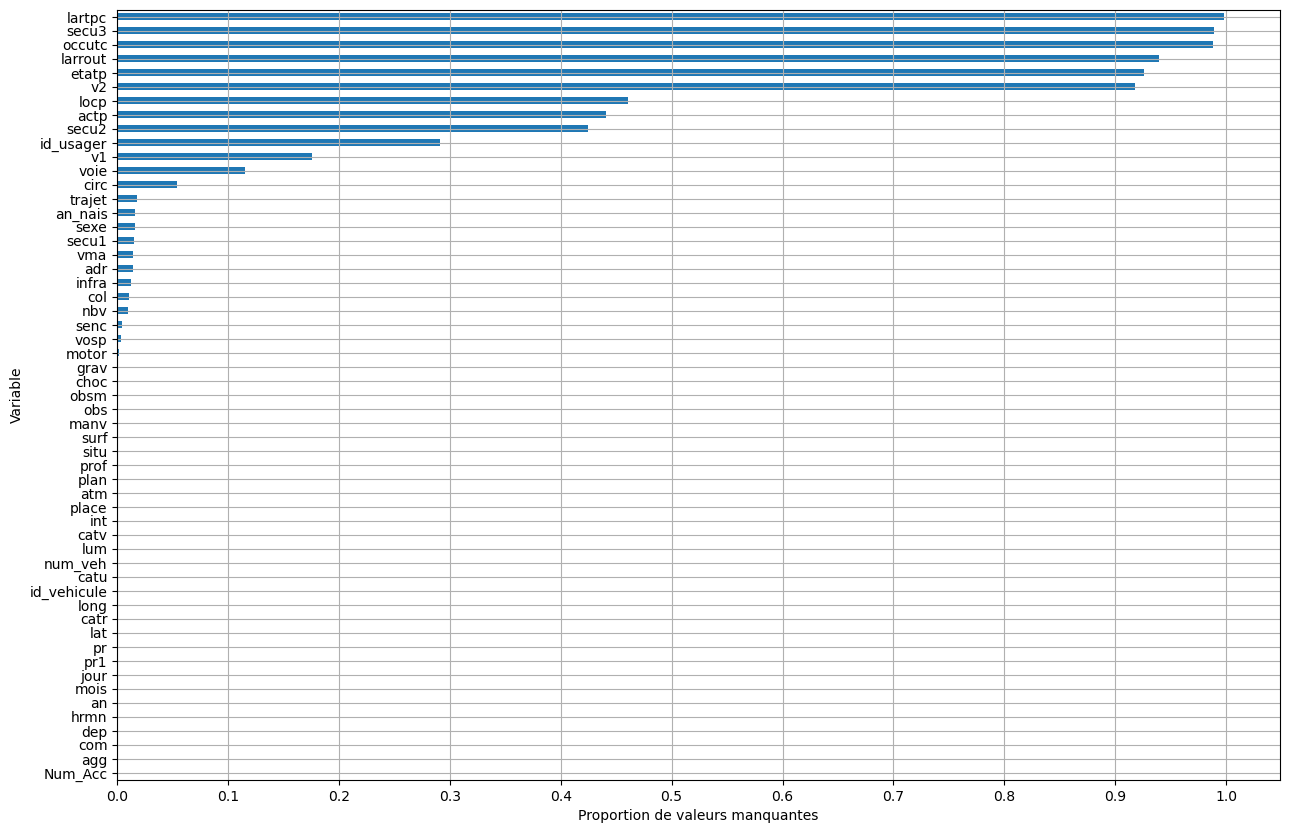

In [62]:
nan_col = df_merged.isna().sum().sort_values(ascending=True)/df_merged.shape[0]
nan_col.plot.barh(figsize=(15,10))  # On trace via pandas
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True)
plt.xlabel('Proportion de valeurs manquantes')
plt.ylabel('Variable')
plt.show();

Les variables suivantes ont des taux de NaN supérieurs à 10% :
- lartpc : largeur du TPC si existe
- secu3 : Présence et utilisation d'un équipeemnt de sécurité (3eme renseignement possible)
- occutc : Nb d'occupants dans le transport en commun
- larrout : Largeur de la chaussée
- etatp : Si piéton accidenté accompagné ou non
- v2 : Lettre indice alphanum de la route
- locp : Localisation du piéton
- actp : Action du piéton
- secu2 : Présence et utilisation d'un équipeemnt de sécurité (2eme renseignement possible)
- id_usager : Identifiant unique de l'usager (que depuis 2021)
- v1 : Indice num du numéro de route
- voie : Numéro de la route

Au vu du nombre important de NaN, ces variables ne seront pas analysées (gestion des NaN peu envisageable). Nous faisons cependant l'exception pour les équipements de sécurité. Ils seront regroupés dans des variables pour chaque élément.

3 variables concernant les piétons sont également non utilisables. Pour la suite, on retirera également les autres variables en lien avec des piétons (catu = 3 (Piéton))

Pour la localisation des accidents, du fait d'avoir les latitudes et longitudes, nous pouvons supprimer les autres variables. Nous gardons tout de même la variable dep (département) et com (commune).

In [65]:
df_merged = df_merged.drop(['lartpc', 'occutc', 'larrout', 'etatp', 'locp', 'actp', 'id_usager',
                            'voie', 'v1', 'v2', 'adr', 'pr', 'pr1'], axis=1)

df_merged = df_merged[df_merged["catu"] != 3]

On trie les variables 'secu', 'secu2' et 'secu3'

In [67]:
df_merged['Ceinture'] = df_merged[['secu1', 'secu2', 'secu3']].isin([1]).any(axis=1)
df_merged['Casque'] = df_merged[['secu1', 'secu2', 'secu3']].isin([2]).any(axis=1)
df_merged['Dispositif enfants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([3]).any(axis=1)
df_merged['Gilet réfléchissant'] = df_merged[['secu1', 'secu2', 'secu3']].isin([4]).any(axis=1)
df_merged['Airbag'] = df_merged[['secu1', 'secu2', 'secu3']].isin([5, 7]).any(axis=1)
df_merged['Gants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([6, 7]).any(axis=1)
df_merged['Autre equipement'] = df_merged[['secu1', 'secu2', 'secu3']].isin([9]).any(axis=1)

df_merged = df_merged.drop(['secu1', 'secu2', 'secu3'], axis=1)

On enlève les limitations de vitesse > à 130 km/h

In [69]:
df_merged.loc[df_merged['vma'] > 130, 'vma'] = np.nan

On convertit dans le bon format les latitudes et longitudes

In [71]:
df_merged['lat'] = df_merged['lat'].str.replace(',', '.').astype(float)
df_merged['long'] = df_merged['long'].str.replace(',', '.').astype(float)

On ne garde pas les victimes trop vieilles

In [73]:
df_merged = df_merged[df_merged["an_nais"] >= 1920]

In [74]:
# On convertit le df pour avoir des dates exploitables

df_merged['date'] = df_merged['jour'].astype(str) + '-' + df_merged['mois'].astype(str) + '-' + df_merged['an'].astype(str) + '-' 
df_merged['date'] = pd.to_datetime(df_merged['date'], dayfirst=True)


In [75]:
# On crée une variable région

region = pd.read_csv("../data/departements-region.csv")
region = region.rename(columns={'num_dep': 'dep'})

df_merged = df_merged.merge(region, how='left', on='dep')

### Traitement de la donnée en vue de la modélisation
Ce regroupement se base sur les observations faites lors de la data visualisation

In [77]:
# On crée une variable heure

df_merged['hrmn'] = df_merged['hrmn'].str.replace(':', '')
df_merged['heure'] = df_merged['hrmn'].astype(int)//100

# On supprime la variable initiale
df_merged = df_merged.drop(['hrmn'], axis=1)


In [78]:
# Variable place : place dans le véhicule

# Modalité : 1 à 9
# On regroupe en 3 catégories : conducteur, passager avant, passager arrière
df_merged['place'] = df_merged['place'].astype(int)

df_merged['conducteur'] = df_merged['place'].apply(lambda x: 1 if x==1 else 0)
df_merged['passager_avant'] = df_merged['place'].apply(lambda x: 1 if x in [2, 6] else 0)
df_merged['passager_arrière'] = df_merged['place'].apply(lambda x: 1 if x not in [1, 2, 6] else 0)

# On supprime la variable initiale
df_merged = df_merged.drop(['place'], axis=1)


In [79]:
# Variable catu : conducteur ou passager

# Modalité 1 (conducteur) ou 2 (passager)
# Le nombre d'occurence entre conducteur ou passager n'est pas cohérent avec celui de la variable place
# (263561 conducteurs contre 263915 pour variable catu)
# On garde la variable place car plus précise

df_merged = df_merged.drop(['catu'], axis=1)


In [80]:
# Variable grav : gravité de l'accident

# Modalité : 'Indemne' (1), 'Tué' (2), 'Blessé hospitalisé' (3), 'Blessé léger' (4)
# Variable cible
# On supprime le seul NaN présent

df_merged = df_merged.dropna(subset=['grav'])
df_merged['grav'] = df_merged['grav'].astype(int)


In [81]:
# Variable sexe : sexe de l'usager

# Modalité : Masculin' (1), 'Féminin' (2)
# Nb NaN : 4, on remplace par le mode

df_merged['sexe'] = df_merged['sexe'].fillna(df_merged['sexe'].mode()[0])
df_merged['sexe'] = df_merged['sexe'].astype(int)


In [82]:
# Variable an_nais : année de naissance de l'usager

# On tranforme cette variable pour connaître l'âge de l'usager
df_merged['an_nais'] = df_merged['an_nais'].astype(int)

df_merged['age'] = df_merged['an'] - df_merged['an_nais']


In [83]:
# Variable trajet : motif du trajet

# Modalité : 5.  9.  4.  0. nan  2.  3.  1.
# Nb NaN : 503, on remplace par le mode

df_merged['trajet'] = df_merged['trajet'].replace(0, np.nan)
df_merged['trajet'] = df_merged['trajet'].fillna(df_merged['trajet'].mode()[0])
df_merged['trajet'] = df_merged['trajet'].astype(int)

# On regroupe en 3 catégorie : autre, pro ou perso
df_merged['trajet_pro'] = df_merged['trajet'].apply(lambda x: 1 if x in [1, 4] else 0)
df_merged['trajet_perso'] = df_merged['trajet'].apply(lambda x: 1 if x in [2, 3, 5] else 0)
df_merged['trajet_autre'] = df_merged['trajet'].apply(lambda x: 1 if x==9 else 0)

df_merged = df_merged.drop(['trajet'], axis=1)


In [84]:
# Variable senc : sens de circulation

# Modalité : 0 1 2 3
# Nb NaN : 1376, on les place dans la catégorie inconnu

df_merged['senc'] = df_merged['senc'].fillna(0)
df_merged['senc'] = df_merged['senc'].astype(int)


In [85]:
# Variable catv : categorie du vehicule

# Modalité : nombreuse
# Nb NaN : 3, on les place dans le mode

df_merged['catv'] = df_merged['catv'].fillna(0)
df_merged['catv'] = df_merged['catv'].astype(int)

# On regroupe en sous-catégorie
df_merged['catv_velo'] = df_merged['catv'].apply(lambda x: 1 if x in [1,80] else 0)
df_merged['catv_moto'] = df_merged['catv'].apply(lambda x: 1 if x in [2,4,5,30,31,32,33,34] else 0)
df_merged['catv_voiture'] = df_merged['catv'].apply(lambda x: 1 if x in [7] else 0)
df_merged['catv_utilitaire'] = df_merged['catv'].apply(lambda x: 1 if x in [10] else 0)
df_merged['catv_veh_remorque'] = df_merged['catv'].apply(lambda x: 1 if x in [8,9,11,12] else 0)
df_merged['catv_PL'] = df_merged['catv'].apply(lambda x: 1 if x in [13,14,15] else 0)
df_merged['catv_tracteur'] = df_merged['catv'].apply(lambda x: 1 if x in [16,17,21] else 0)
df_merged['catv_tram_train'] = df_merged['catv'].apply(lambda x: 1 if x in [19,39,40] else 0)
df_merged['catv_quad_3roues'] = df_merged['catv'].apply(lambda x: 1 if x in [135,36,41,42,43] else 0)
df_merged['catv_autre_inconnu'] = df_merged['catv'].apply(lambda x: 1 if x in [0,3,6,18,20,99] else 0)
df_merged['catv_bus_car'] = df_merged['catv'].apply(lambda x: 1 if x in [37,38] else 0)
df_merged['catv_EDP'] = df_merged['catv'].apply(lambda x: 1 if x in [50,60] else 0)

df_merged = df_merged.drop(['catv'], axis=1)


In [86]:
# Variable obs : obstacle heurté

# Modalité : nombreuse
# Nb NaN : 94, on les place dans le mode

df_merged['obs'] = df_merged['obs'].fillna(df_merged['obs'].mode()[0])
df_merged['obs'] = df_merged['obs'].astype(int)


In [87]:
# Variable obsm : obstacle mobile heurté

# Modalité : nombreuse
# Nb NaN : 129, on les place dans le mode

df_merged['obsm'] = df_merged['obsm'].fillna(df_merged['obsm'].mode()[0])
df_merged['obsm'] = df_merged['obsm'].astype(int)


In [88]:
# Variable choc : point de choc

# Modalité : 0 à 9
# Nb NaN : 118, on les place dans le mode

df_merged['choc'] = df_merged['choc'].fillna(df_merged['choc'].mode()[0])
df_merged['choc'] = df_merged['choc'].astype(int)

# On regroupe en sous-catégorie
df_merged['choc_avant'] = df_merged['choc'].apply(lambda x: 1 if x in [1,2,3] else 0)
df_merged['choc_arriere'] = df_merged['choc'].apply(lambda x: 1 if x in [4,5,6] else 0)
df_merged['choc_cote'] = df_merged['choc'].apply(lambda x: 1 if x in [7,8] else 0)
df_merged['choc_tonneaux'] = df_merged['choc'].apply(lambda x: 1 if x in [9] else 0)
df_merged['choc_aucun'] = df_merged['choc'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['choc'], axis=1)


In [89]:
# Variable manv : manoeuvre lors de l'accident

# Modalité : nombreuse
# Nb NaN : 79, on les place dans le mode

df_merged['manv'] = df_merged['manv'].fillna(df_merged['manv'].mode()[0])
df_merged['manv'] = df_merged['manv'].astype(int)

# On regroupe en sous-catégorie
df_merged['manv_diverse'] = df_merged['manv'].apply(lambda x: 1 if x in [3,4,5,6,7,8,9,10,19,20,21,22,23,24,25,26] else 0)
df_merged['manv_droite'] = df_merged['manv'].apply(lambda x: 1 if x in [12,14,16,18] else 0)
df_merged['manv_gauche'] = df_merged['manv'].apply(lambda x: 1 if x in [11,13,15,17] else 0)
df_merged['manv_pas_chang_dir'] = df_merged['manv'].apply(lambda x: 1 if x in [1] else 0)
df_merged['manv_meme_sens_file'] = df_merged['manv'].apply(lambda x: 1 if x in [2] else 0)
df_merged['manv_inconnue'] = df_merged['manv'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['manv'], axis=1)


In [90]:
# Variable motor : type de moteur

# Modalité : 0 à 6
# Nb NaN : 420

df_merged['motor'] = df_merged['motor'].fillna(0)
df_merged['motor'] = df_merged['motor'].astype(int)


In [91]:
# Variable catr : type de route

# Modalité : 1 à 7, 9
# Nb NaN : 0

df_merged['catr'] = df_merged['catr'].astype(int)


In [92]:
# Variable circ : régime de circulation

# Modalité : 1 à 4
# Nb NaN : 16866 (5% de NaN) -> on essaie de réduire le nb NaN via d'autre variables

# On regroupe en une catégorie : bidirectionnelle ou non

df_merged['circ'] = df_merged['circ'].fillna(df_merged['circ'].mode()[0])
df_merged['chaussee_bidirectionnelle'] = df_merged['circ'].apply(lambda x: 1 if x == 2 else 0)

df_merged['circ'] = df_merged['circ'].astype(int)
df_merged = df_merged.drop(['circ'], axis=1)


In [93]:
# Variable nbv : nombre de voies

# Modalité : 0 à 12
# Nb NaN : 2624

df_merged['nbv'] = df_merged['nbv'].replace('#ERREUR', np.nan)
df_merged['nbv'] = df_merged['nbv'].fillna(df_merged['nbv'].mode()[0])
df_merged['nbv'] = df_merged['nbv'].astype(int)


In [94]:
# Variable vosp : présence d'une voie réservée

# Modalité : 0 à 3
# Nb NaN : 1232

df_merged['vosp'] = df_merged['vosp'].fillna(df_merged['vosp'].mode()[0])
df_merged['voie_reservee'] = df_merged['vosp'].apply(lambda x: 0 if x == 0 else 1)

df_merged = df_merged.drop(['vosp'], axis=1)


In [95]:
# Variable prof : profil en long

# Modalité : 1 à 4
# Nb NaN : 44

df_merged['prof'] = df_merged['prof'].fillna(df_merged['prof'].mode()[0])
df_merged['prof'] = df_merged['prof'].astype(int)


In [96]:
# Variable plan : tracé en plan

# Modalité : 1 à 4
# Nb NaN : 39

df_merged['plan'] = df_merged['plan'].fillna(df_merged['plan'].mode()[0])
df_merged['plan'] = df_merged['plan'].astype(int)


In [97]:
# Variable surf : état de la chaussée

# Modalité : 1 à 9
# Nb NaN : 58

df_merged['surf'] = df_merged['surf'].fillna(df_merged['surf'].mode()[0])
df_merged['surf'] = df_merged['surf'].astype(int)

# On regroupe en une catégorie : chaussée sèche ou non
df_merged['chaussee_seche'] = df_merged['surf'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['surf'], axis=1)


In [98]:
# Variable infra : présence d'un aménagement

# Modalité : 0 à 9
# Nb NaN : 3774

df_merged['infra'] = df_merged['infra'].fillna(df_merged['infra'].mode()[0])
df_merged['infra'] = df_merged['infra'].astype(int)


In [99]:
# Variable situ : situation de l'accident

# Modalité : 1 à 8
# Nb NaN : 42

df_merged['situ'] = df_merged['situ'].fillna(df_merged['situ'].mode()[0])
df_merged['situ'] = df_merged['situ'].astype(int)


In [100]:
# Variable vma : vitesse maximale autorisée

# Modalité : nombreuses
# Nb NaN : 4907

df_merged['vma'] = df_merged['vma'].fillna(df_merged['vma'].mode()[0])
df_merged['vma'] = df_merged['vma'].astype(int)

# On regroupe en sous catégorie
df_merged['vma'] = df_merged['vma'].apply(lambda x: 30 if x<=30. else x)


In [101]:
# Variable lum : luminosité

# Modalité : 1 à 5
# Nb NaN : 7

df_merged['lum'] = df_merged['lum'].fillna(df_merged['lum'].mode()[0])
df_merged['lum'] = df_merged['lum'].astype(int)


In [102]:
# Variable agg : si en agglomération

# Modalité : 1, 2
# Nb NaN : 0

df_merged['agg'] = df_merged['agg'].astype(int)


In [103]:
# Variable int : si intersection

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['int'] = df_merged['int'].fillna(df_merged['int'].mode()[0])
df_merged['int'] = df_merged['int'].astype(int)

# On regroupe en sous-catégorie
df_merged['int_aucune'] = df_merged['int'].apply(lambda x: 1 if x in [1] else 0)
df_merged['int_branches'] = df_merged['int'].apply(lambda x: 1 if x in [2,3,4,5] else 0)
df_merged['int_autre'] = df_merged['int'].apply(lambda x: 1 if x in [6,7,8,9] else 0)

df_merged = df_merged.drop(['int'], axis=1)


In [104]:
# Variable atm : condition atmo

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['atm'] = df_merged['atm'].fillna(df_merged['atm'].mode()[0])
df_merged['atm'] = df_merged['atm'].astype(int)

# On regroupe en une catégorie : cbeau temps ou non
df_merged['atm_normal'] = df_merged['atm'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['atm'], axis=1)


In [105]:
# Variable col : type de collision

# Modalité : 1 à 7
# Nb NaN : 3646

df_merged['col'] = df_merged['col'].fillna(df_merged['col'].mode()[0])
df_merged['col'] = df_merged['col'].astype(int)


In [106]:
# Variables équipement

for item in ['Ceinture', 'Casque', 'Dispositif enfants', 'Gilet réfléchissant', 'Airbag', 'Gants', 'Autre equipement']:
    df_merged[item] = df_merged[item].apply(lambda x: 1 if x else 0)


In [107]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327872 entries, 0 to 327872
Data columns (total 75 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Num_Acc                    327872 non-null  int64         
 1   id_vehicule                327872 non-null  object        
 2   num_veh                    327872 non-null  object        
 3   grav                       327872 non-null  int32         
 4   sexe                       327872 non-null  int32         
 5   an_nais                    327872 non-null  int32         
 6   senc                       327872 non-null  int32         
 7   obs                        327872 non-null  int32         
 8   obsm                       327872 non-null  int32         
 9   motor                      327872 non-null  int32         
 10  catr                       327872 non-null  int32         
 11  nbv                        327872 non-null  int32        

## Recherche corrélation

In [109]:
df_merged_2 = df_merged.drop(['Num_Acc', 'id_vehicule', 'num_veh', 'dep', 'com', 'date', 'dep_name', 'region_name'], axis=1)

<Axes: >

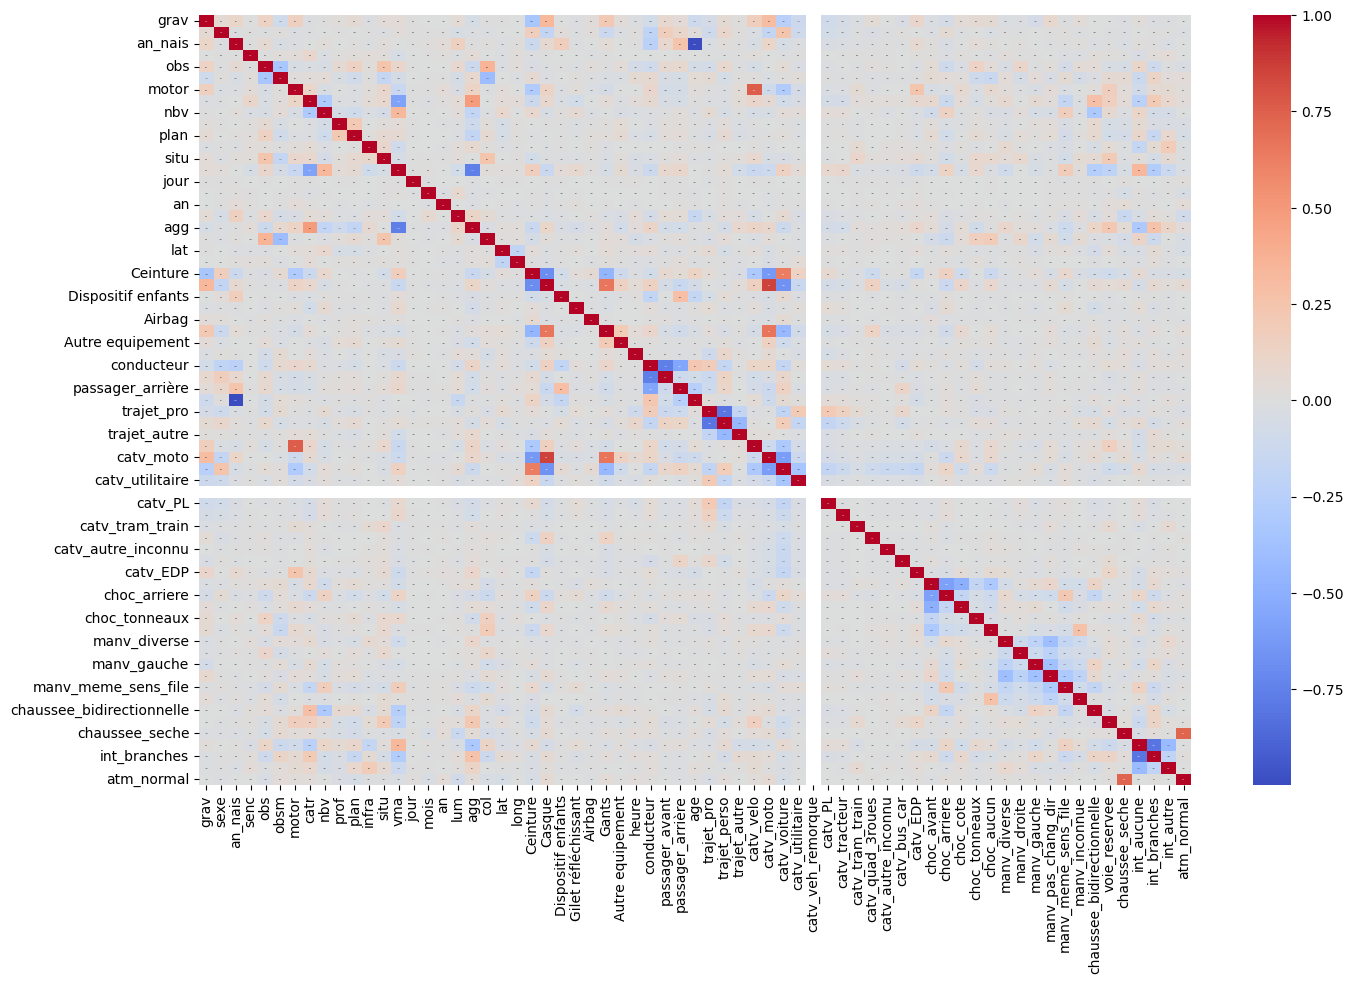

In [110]:
plt.figure(figsize=(16,10))
sns.heatmap(df_merged_2.corr(), cmap='coolwarm', annot=True, fmt=".2f",annot_kws={'size': 0.2})

Nous réalisons le test du khi deux car recherche de corrélation entre variables catégorielles.

Les hypothèses sont décrites ci-dessous :
- H0 : La variable est indépendante de la variable cible (gravité)
- H1 : La variable n'est pas indépendante de la variable cible (gravité)

On fixe la p-value à 0.05 : Si la valeur de p ≤ 0,05, nous pouvons rejeter l'hypothèse H0 et affirmer que les résultats soutiennent H1.

In [112]:
cible = df_merged_2['grav']
data = df_merged_2.drop('grav', axis=1)

from scipy.stats import chi2_contingency

chi_list = []

for variable in data:
    
    # création de la table de contingence
    ct = pd.crosstab(cible, data[variable])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    chi_list.append(p_value)
    
    if p_value <= 0.05:
        print(f"{variable} :\n H0 rejetée : il existe une relation entre les 2 variables qualitatives\n")
    else:
        print(f"{variable} :\n H0 acceptée : les 2 variables qualitatives sont indépendantes\n")

sexe :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

an_nais :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

senc :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

obs :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

obsm :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

motor :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

catr :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

nbv :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

prof :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

plan :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

infra :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

situ :
 H0 rejetée : il existe une relation entre les 2 variables qualitatives

vma :
 H0 rejetée : il existe une rel

In [113]:
df_pvalue = pd.DataFrame(chi_list, 
                         index=data.columns, 
                         columns=['p_value']).sort_values(by='p_value', ascending=True)

pd.set_option('display.float_format', '{:,.5f}'.format)
display(df_pvalue)

,p_value
sexe,0.00000
heure,0.00000
conducteur,0.00000
passager_avant,0.00000
trajet_pro,0.00000
...,...
an,0.00000
atm_normal,0.00000
jour,0.00575
catv_autre_inconnu,0.28209


Toutes les variables sont corrélées avec la variable cible. Cela signifie qu'on peut les utiliser pour nos modèles de ML.
A noter deux variables qui n'ont pas fait un score aussi bon que les autres :
- 'catv_autre_inconnu' à cause du peu de donnée qu'elle contient ;
- 'catv_veh_remorque' car contient aucun accident recensé dans cette catégorie.


### Finalisation du preprocessing : encodage des features restantes

In [116]:
df_merged_2.columns

Index(['grav', 'sexe', 'an_nais', 'senc', 'obs', 'obsm', 'motor', 'catr',
       'nbv', 'prof', 'plan', 'infra', 'situ', 'vma', 'jour', 'mois', 'an',
       'lum', 'agg', 'col', 'lat', 'long', 'Ceinture', 'Casque',
       'Dispositif enfants', 'Gilet réfléchissant', 'Airbag', 'Gants',
       'Autre equipement', 'heure', 'conducteur', 'passager_avant',
       'passager_arrière', 'age', 'trajet_pro', 'trajet_perso', 'trajet_autre',
       'catv_velo', 'catv_moto', 'catv_voiture', 'catv_utilitaire',
       'catv_veh_remorque', 'catv_PL', 'catv_tracteur', 'catv_tram_train',
       'catv_quad_3roues', 'catv_autre_inconnu', 'catv_bus_car', 'catv_EDP',
       'choc_avant', 'choc_arriere', 'choc_cote', 'choc_tonneaux',
       'choc_aucun', 'manv_diverse', 'manv_droite', 'manv_gauche',
       'manv_pas_chang_dir', 'manv_meme_sens_file', 'manv_inconnue',
       'chaussee_bidirectionnelle', 'voie_reservee', 'chaussee_seche',
       'int_aucune', 'int_branches', 'int_autre', 'atm_normal'],
      d

In [117]:
num_features = ['heure', 'an_nais', 'age', 'nbv', 'vma', 'lat', 'long', 'jour', 'mois', 'an']
to_cat_features = ['senc', 'obs', 'obsm', 'motor', 'catr', 'prof', 'plan', 'infra', 'situ', 'lum', 'col']


In [118]:
df_cat = df_merged_2.drop(num_features, axis=1)

In [119]:
X = df_cat.drop('grav', axis=1)
y = df_cat['grav']

In [120]:
X = pd.get_dummies(X, columns=to_cat_features, drop_first=True)

### Split du jeu de données

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Transformation variable cible en binaire

In [224]:
y_train.value_counts()

grav
1    116472
4    101313
3     38043
2      6469
Name: count, dtype: int64

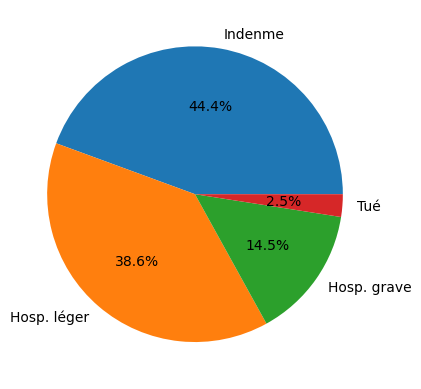

In [226]:
plt.pie(y_train.value_counts(), labels=['Indenme', 'Hosp. léger', 'Hosp. grave', 'Tué'], autopct='%1.1f%%')
plt.show();

La classe 'tué' et 'hospitalisé grave' sont sous représenté dans le dataset. Pour voir si les prédictions puissent être améliorées, nous allons 
redécomposer la variable cible en deux classes : indenme (0) ou blessé (1)

In [228]:
y_train = y_train.replace({1:0, 4:1, 3:1, 2:1})
y_test = y_test.replace({1:0, 4:1, 3:1, 2:1})

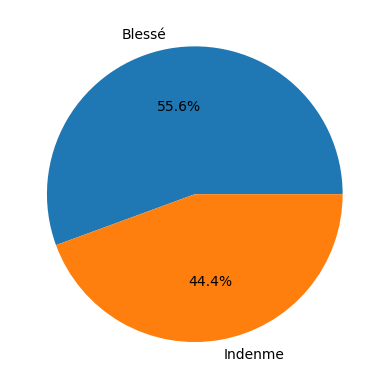

In [230]:
plt.pie(y_train.value_counts(), labels=['Blessé', 'Indenme'], autopct='%1.1f%%')
plt.show();

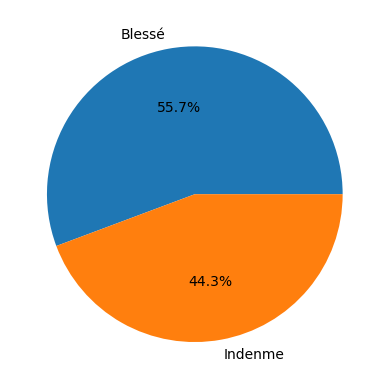

In [232]:
plt.pie(y_test.value_counts(), labels=['Blessé', 'Indenme'], autopct='%1.1f%%')
plt.show();

## On lance les modèles

### Random Forest

In [241]:
# On teste avec des paramètres quelconque pour le moment. L'objectif sera de les faire varier plus tard via un GridSearch
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30, 
                               max_depth=20, 
                               random_state=42)
model.fit(X_train, y_train)

# Mesure performance modèle
print('Score test :', model.score(X_test, y_test))
print('Score train :', model.score(X_train, y_train))

Score test : 0.7839878002287457
Score train : 0.8236236022524085


Accuracy score test : 0.7839878002287457
Accuracy score train : 0.8236236022524085
Recall test : 0.7842433418734602
f1 score test : 0.7823362725328196


Prédiction,0,1
Réalité,,
0,22849,6203
1,7962,28561


              precision    recall  f1-score   support

           0       0.74      0.79      0.76     29052
           1       0.82      0.78      0.80     36523

    accuracy                           0.78     65575
   macro avg       0.78      0.78      0.78     65575
weighted avg       0.79      0.78      0.78     65575



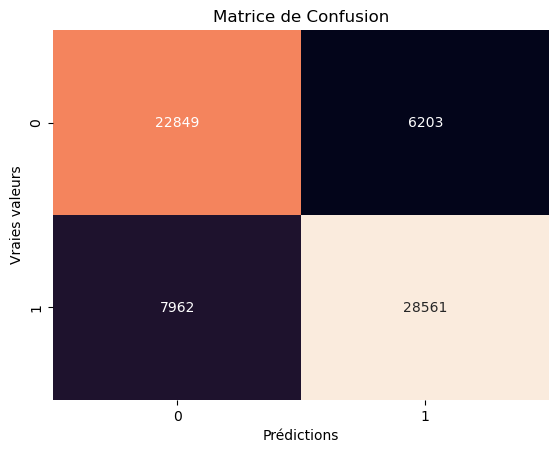

In [243]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred))
print('Accuracy score train :', accuracy_score(y_train, y_pred_train))
print('Recall test :', recall_score(y_test, y_pred, average='macro'))
print('f1 score test :', f1_score(y_test, y_pred, average='macro'))

conf_matrix = confusion_matrix(y_test, y_pred)

display(pd.crosstab(y_test, y_pred, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();

### XGBoost

In [246]:
from sklearn.ensemble import GradientBoostingClassifier

model_boost = GradientBoostingClassifier(loss="log_loss",
                                         learning_rate=0.2,
                                         max_depth=5,
                                         max_features="sqrt",
                                         subsample=0.95,
                                         n_estimators=200)
model_boost.fit(X_train, y_train)

# Mesure performance modèle
print('Score test :', model_boost.score(X_test, y_test))
print('Score train :', model_boost.score(X_train, y_train))

Score test : 0.7858940144872284
Score train : 0.7909430912286454


Accuracy score test : 0.7858940144872284
Accuracy score train : 0.7909430912286454
Recall test : 0.7842612243581455
f1 score test : 0.7835673364626329


Prédiction,0,1
Réalité,,
0,22368,6684
1,7356,29167


              precision    recall  f1-score   support

           0       0.75      0.77      0.76     29052
           1       0.81      0.80      0.81     36523

    accuracy                           0.79     65575
   macro avg       0.78      0.78      0.78     65575
weighted avg       0.79      0.79      0.79     65575



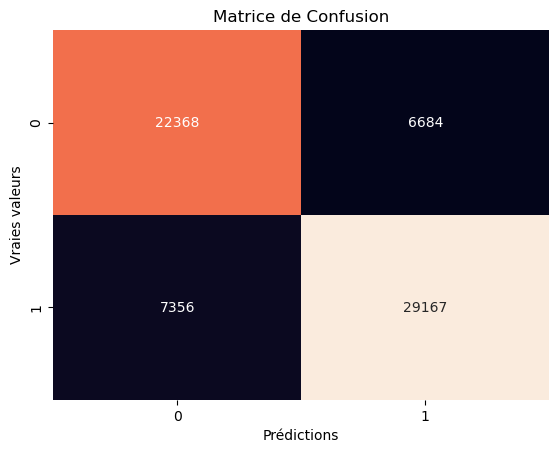

In [248]:
y_pred_boost = model_boost.predict(X_test)
y_pred_boost_train = model_boost.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost))
print('Accuracy score train :', accuracy_score(y_train, y_pred_boost_train))
print('Recall test :', recall_score(y_test, y_pred_boost, average='macro'))
print('f1 score test :', f1_score(y_test, y_pred_boost, average='macro'))

conf_matrix_boost = confusion_matrix(y_test, y_pred_boost)

display(pd.crosstab(y_test, y_pred_boost, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred_boost))

sns.heatmap(conf_matrix_boost, annot=True, fmt='d', cbar=False,
            xticklabels=model_boost.classes_,
            yticklabels=model_boost.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();

### Pipeline algo

In [251]:
from lazypredict.Supervised import LazyClassifier

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [253]:
models_list = [ DummyClassifier ,  LogisticRegression ,  RandomForestClassifier ,  BaggingClassifier ,  AdaBoostClassifier ,
                DecisionTreeClassifier ,  ExtraTreesClassifier ,
                KNeighborsClassifier ,  XGBClassifier ,  LGBMClassifier ]

In [255]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None,
                     predictions = True, classifiers=models_list)

models_train, predictions_train = clf.fit( X_train, X_train, y_train, y_train )

models_test, predictions_test = clf.fit( X_train, X_test, y_train, y_test )

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [03:11<00:28, 28.43s/it]

[LightGBM] [Info] Number of positive: 145825, number of negative: 116472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 262297, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555954 -> initscore=0.224756
[LightGBM] [Info] Start training from score 0.224756


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:14<00:00, 19.41s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:55<00:13, 13.89s/it]

[LightGBM] [Info] Number of positive: 145825, number of negative: 116472
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 262297, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555954 -> initscore=0.224756
[LightGBM] [Info] Start training from score 0.224756


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:57<00:00, 11.76s/it]


In [257]:
print("Performances des modèles sur l'ensemble d'entraînement\n")
models_train

Performances des modèles sur l'ensemble d'entraînement



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.78,0.79,0.79,0.79,2.41
ExtraTreesClassifier,0.78,0.79,0.79,0.79,45.78
RandomForestClassifier,0.78,0.78,0.78,0.78,34.59
BaggingClassifier,0.78,0.78,0.78,0.78,11.30
XGBClassifier,0.75,0.75,0.75,0.75,3.16
LGBMClassifier,0.75,0.74,0.74,0.75,2.63
LogisticRegression,0.73,0.73,0.73,0.73,1.54
KNeighborsClassifier,0.73,0.73,0.73,0.73,79.12
AdaBoostClassifier,0.73,0.73,0.73,0.73,12.43


In [259]:
print("Performances des modèles sur l'ensemble de test\n")
models_test

Performances des modèles sur l'ensemble de test



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.74,0.74,0.74,0.74,2.32
LGBMClassifier,0.74,0.74,0.74,0.74,1.92
LogisticRegression,0.73,0.73,0.73,0.73,1.32
AdaBoostClassifier,0.73,0.73,0.73,0.73,10.10
RandomForestClassifier,0.73,0.73,0.73,0.73,29.41
ExtraTreesClassifier,0.73,0.73,0.73,0.73,39.28
BaggingClassifier,0.73,0.72,0.72,0.73,10.06
DecisionTreeClassifier,0.72,0.72,0.72,0.72,1.88
KNeighborsClassifier,0.71,0.70,0.70,0.71,20.69


Meilleur résultat en binaire mais moins d'informations.
Le rééquilibrage des classes permet d'obtenir de meilleures prédictions

Pistes pour la suite :
- Rechercher les meilleurs hyperparamètres ;
- Rééquilibrer les catégories ;
- Regarder les features les plus utilisées et les optimiser.